# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number : 42

## Student 1 
### Name : Otte van Dam
### ID : 5096790

## Student 2
### Name : Suhaib Basir
### ID : 5059151

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbformat
from tqdm import tqdm
from flexfringe import FlexFringe
from sklearn.metrics.pairwise import cosine_similarity



nb = nbformat.read("Lab3.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 328


## 1. Familiarization and discretization task – 1 A4 (5 Points)

In [13]:
# Specify the columns you want to read as strings
string_columns = ['sTos', 'dTos']

# Specify the columns you want to read as strings
data9 = "dataset_lab3/dataset_9/capture20110817.binetflow"
data10 = "dataset_lab3/dataset_10/capture20110818.binetflow"
data11 = "dataset_lab3/dataset_11/capture20110818-2.binetflow"
data12 = "dataset_lab3/dataset_12/capture20110819.binetflow"

df9 = pd.read_csv(data9, dtype={col: str for col in string_columns})
df10 = pd.read_csv(data10, dtype={col: str for col in string_columns})
df11 = pd.read_csv(data11, dtype={col: str for col in string_columns})
df12 = pd.read_csv(data12, dtype={col: str for col in string_columns})


infected_hosts = ['147.32.84.165', '147.32.84.191', '147.32.84.192', '147.32.84.193','147.32.84.204', '147.32.84.205', '147.32.84.206','147.32.84.207', '147.32.84.208', '147.32.84.209']

In [3]:
def discretise_netflow(df1):
    df1['bytes_per_second'] = df1['SrcBytes'] / (df1['Dur'] + 1e-10)

    # Discretize numeric columns using percentiles
    for column in df1.columns:
        if df1[column].dtype == np.float64 or df1[column].dtype == np.int64:
            df1[column] = pd.qcut(df1[column], q=20, labels=False, duplicates='drop')

    return df1

df9 = discretise_netflow(df9)
df10 = discretise_netflow(df10)
df11 = discretise_netflow(df11)
df12 = discretise_netflow(df12)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [4]:
# Filter columns that are either integers or floats
numeric_cols_infected = df10[df10['SrcAddr'] == infected_hosts[1]].select_dtypes(include=['int', 'float'])
numeric_cols_other = df10[df10['SrcAddr'] != infected_hosts[1]].select_dtypes(include=['int', 'float'])

# Calculate the average and standard deviation for df_srcaddr_147
avg_values_infected = numeric_cols_infected.mean()
std_values_infected = numeric_cols_infected.std()
print(f'calculated for infected')

# Calculate the average and standard deviation for df_srcaddr_other
avg_values_other = numeric_cols_other.mean()
std_values_other = numeric_cols_other.std()
print('calculated for other')

# Print the average and standard deviation side by side
print(f"{'Column':<15} {'Average (infected)':<15} {'Std Deviation (infected)':<20} {'Average (Other)':<15} {'Std Deviation (Other)':<20}")
print("-" * 90)
for column in avg_values_infected.index:
    avg_infected = avg_values_infected[column]
    std_infected = std_values_infected[column]
    avg_other = avg_values_other[column]
    std_other = std_values_other[column]
    print(f"{column:<15} {avg_infected:<15.2f} {std_infected:<20.2f} {avg_other:<15.2f} {std_other:<20.2f}")

calculated for infected
calculated for other
Column          Average (infected) Std Deviation (infected) Average (Other) Std Deviation (Other)
------------------------------------------------------------------------------------------
Dur             1.68            5.06                 8.60            5.66                
TotPkts         0.29            1.33                 1.74            2.63                
TotBytes        11.31           1.07                 7.54            4.89                
SrcBytes        13.32           1.14                 7.93            5.09                
bytes_per_second 16.45           4.67                 9.39            5.66                


for infected: 


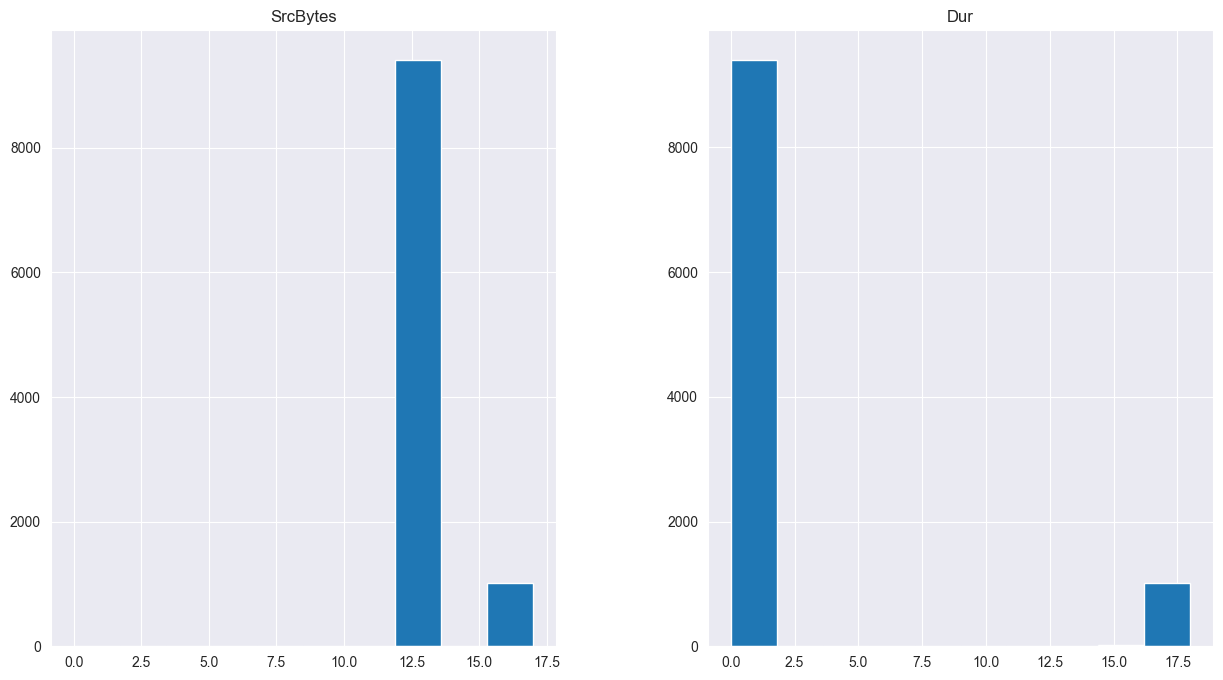

for normal: 


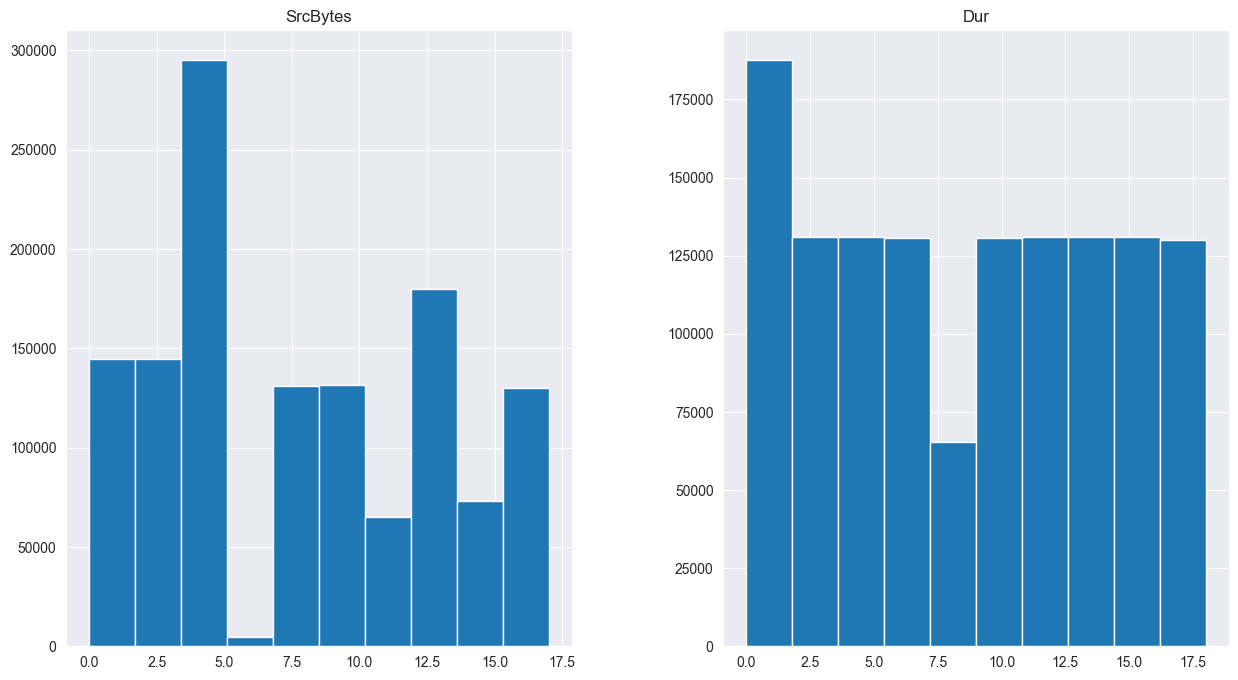

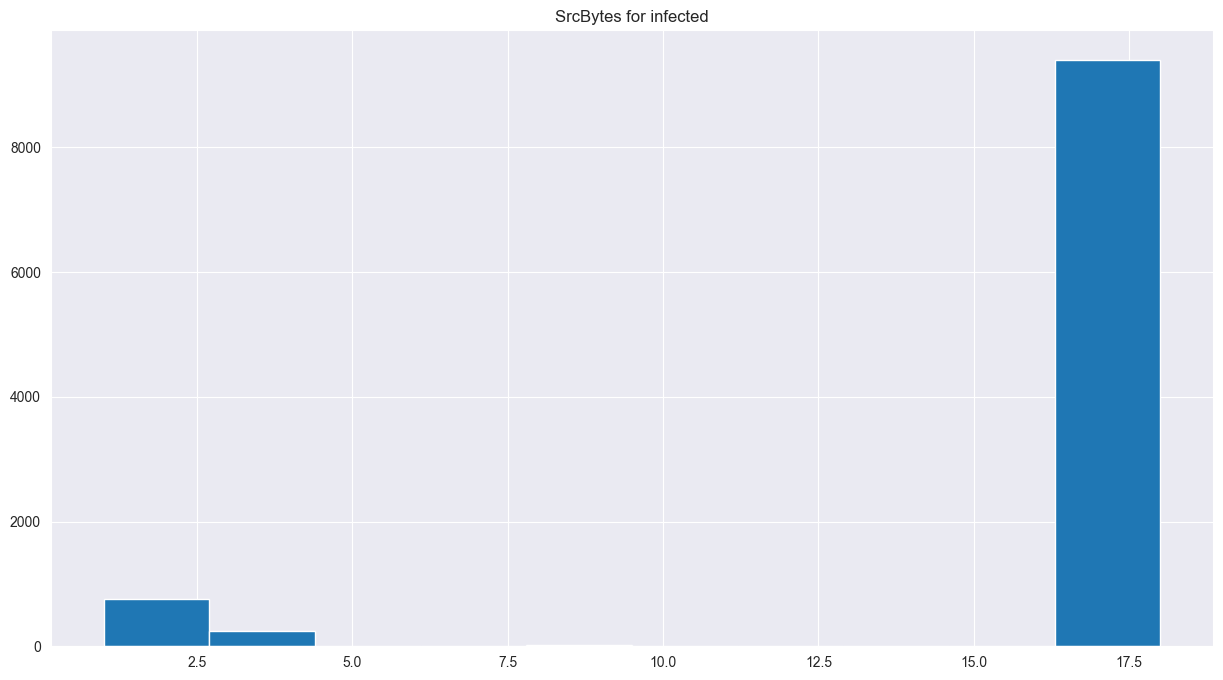

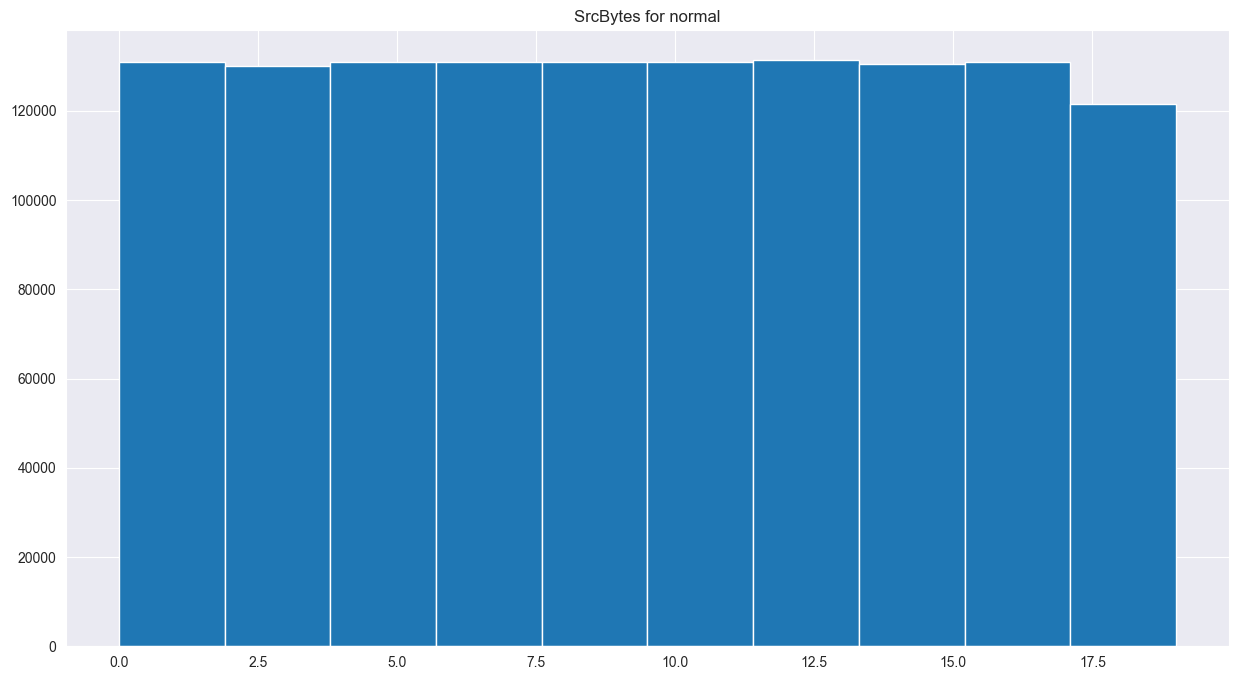

In [5]:
# Let's start by visualizing the 'SrcBytes' and 'duration' features
print('for infected: ')
numeric_cols_infected[['SrcBytes', 'Dur']].hist(bins=10, figsize=(15, 8))
plt.show()
print('for normal: ')
numeric_cols_other[['SrcBytes', 'Dur']].hist(bins=10, figsize=(15, 8))
plt.show()

numeric_cols_infected[['bytes_per_second']].hist(bins=10, figsize=(15, 8))
plt.title('SrcBytes for infected')
numeric_cols_other[['bytes_per_second']].hist(bins=10, figsize=(15, 8))
plt.title('SrcBytes for normal')

plt.show()


### 1c. Answers and explanation

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

### 3b. Analysis and answers to the questions

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### Learn model on infected host

In [6]:
def create_flexfringe(df1):
    botnet_ip = infected_hosts[0]
    df_tracefile = df1[df1['SrcAddr'] == botnet_ip]
    df_tracefile = df_tracefile.rename(columns={"bytes_per_second": "symb"})[['symb']]
    flexfringe = FlexFringe(
        flexfringe_path="flexfringe-x64-windows.exe",
        heuristic_name="alergia",
        data_name="alergia_data",
        slidingwindow=1,
        swsize=10,
        sinkson=1,
        sinkcount=50,
        printblue=1,
        printwhite=1,
    )
    # Learn a state machine
    flexfringe.fit(df_tracefile,
                   sinkson=1,
                   sinkcount=50)
    flexfringe.show()
    return flexfringe

### Profiling

In [7]:
def make_profile(flex_fringe, trace_file):
    # Use state machine to predict likelihoods
    df = flex_fringe.predict(trace_file)
    return df[['abbadingo trace', 'state sequence']]

def create_profiles(df1, flexfringe):
    df1_profiling = df1[['SrcAddr', 'bytes_per_second']]
    df1_profiling = df1_profiling.rename(columns={"bytes_per_second": "symb"})
    # Filter out src addresses that have less than 20 connections
    df1_profiling = df1_profiling.groupby('SrcAddr').filter(lambda x: len(x) >= 20)
    # Get the unique values in the 'SrcAddr' column
    unique_src_addrs = df1_profiling['SrcAddr'].unique()
    src_addr_with_state_trace = []
    # Iterate over each unique 'SrcAddr' value
    for src_addr in tqdm(unique_src_addrs, maxinterval=len(unique_src_addrs)):
        # Filter the dataframe based on the current 'SrcAddr' value
        filtered_df = df1_profiling[df1_profiling['SrcAddr'] == src_addr]
        trace_state = make_profile(flexfringe, filtered_df)
        src_addr_with_state_trace.append([src_addr, trace_state])
    return src_addr_with_state_trace

100%|██████████| 981/981 [06:28<00:00,  2.53it/s] 


In [9]:
def create_counts(src_addr_with_state_trace):
    # Create an empty dictionary to store the counts
    counts = {}

    # Iterate over each IP address and corresponding DataFrame
    for item in tqdm(src_addr_with_state_trace, maxinterval=len(src_addr_with_state_trace)):
        ip_address = item[0]
        dataframe = item[1]

        # Iterate over each row in the DataFrame
        for _, row in dataframe.iterrows():
            states = row['state sequence']
            trace = row['abbadingo trace']

            # Get the shorter length between state sequence and abbadingo trace
            length = min(len(states), len(trace))

            # Iterate over each state and symbol combination
            for i in range(length):
                state = states[i]
                symbol = trace[i]

                # Cut off the state if it reaches -1
                if state == -1:
                    break

                # Create a tuple representing the state and symbol combination
                combination = (state, symbol)

                # Update the counts dictionary
                if ip_address in counts:
                    if combination in counts[ip_address]:
                        counts[ip_address][combination] += 1
                    else:
                        counts[ip_address][combination] = 1
                else:
                    counts[ip_address] = {combination: 1}

    # Create a DataFrame from the counts dictionary
    df_counts = pd.DataFrame(counts).fillna(0).astype(int).transpose()

    # Sort the columns in ascending order
    df_counts = df_counts.reindex(sorted(df_counts.columns),axis=1)
    return df_counts

100%|██████████| 981/981 [00:15<00:00, 65.12it/s] 


In [ ]:
def print_false_postives(df_cos_sim, botnet_ip):
    threshold = 0.999
    print('false positives for threshold: ', threshold)
    print()
    for index in df_cos_sim[df_cos_sim[botnet_ip] > threshold][botnet_ip].index:
        if index not in infected_hosts:
            print(index)
            print(df_cos_sim[df_cos_sim[botnet_ip] > threshold][botnet_ip][index])
            print()

In [14]:
def create_cosine_matrix(df_counts, botnet_ip, printing):
    cos_sim_matrix = cosine_similarity(df_counts)
    # Convert the cosine similarity matrix to a DataFrame
    df_cos_sim = pd.DataFrame(cos_sim_matrix, index=df_counts.index, columns=df_counts.index)
    if printing:
        print('similarity scores for infected hosts')
        for ip_address in infected_hosts:
            print(ip_address)
            print(df_cos_sim.loc[botnet_ip, ip_address])
            print()
        print_false_postives(df_cos_sim, botnet_ip)

similarity scores for infected hosts
147.32.84.165
1.0000000000000018

147.32.84.191
0.9999900043779933

147.32.84.192
0.9999956656280344

147.32.84.193
0.9999888096848317

147.32.84.204
0.9999871119510997

147.32.84.205
0.9999450616815674

147.32.84.206
0.999936303595828

147.32.84.207
0.9998822078009846

147.32.84.208
0.9999083125847313

147.32.84.209
0.9996175971408506



In [ ]:
# Define the three IP addresses for the y-axis
ip_addresses = ['147.32.84.192', '147.32.96.45', '147.32.87.16']
correctness = ['true positive', 'true negative', 'false positive']
# Get the occurrences for the botnet_ip row
botnet_occurrences = df_counts.loc[botnet_ip]

# Get the occurrences for the given IP addresses
ip_occurrences = df_counts.loc[ip_addresses]

for ip_address in ip_addresses:
    x = botnet_occurrences
    y = ip_occurrences.loc[ip_address]
    # Calculate the coefficients of the regression line (y = mx + c)
    coefficients = np.polyfit(x, y, 1)
    m = coefficients[0]  # Slope
    c = coefficients[1]  # Intercept

    # Generate points for the regression line
    regression_x = np.linspace(min(x), max(x), 100)
    regression_y = m * regression_x + c

    # Plot the data points and the regression line
    plt.scatter(x, y, label=correctness[ip_addresses.index(ip_address)])
    plt.plot(regression_x, regression_y, label=ip_address)

plt.plot(botnet_occurrences, botnet_occurrences, color='r', linestyle='--', label= 'botnet')
plt.xlabel('Occurrences for Botnet IP')
plt.ylabel('Occurrences for Other IP Addresses')
plt.xlim(-50, 18000)
plt.ylim(-50, 18000)
plt.legend()
# Show the plot
plt.show()


In [16]:
# Separate the infected and non-infected IP addresses
infected_ips = set(infected_hosts)
non_infected_ips = set(df_counts.index) - infected_ips

# Calculate the occurrence percentages and counts for each state-symbol combination in infected and non-infected IP addresses
occurrence_infected = (df_counts.loc[infected_ips] > 0).mean()
occurrence_non_infected = (df_counts.loc[non_infected_ips] > 0).mean()
total_count_infected = df_counts.loc[infected_ips].sum()
total_count_non_infected = df_counts.loc[non_infected_ips].sum()

# Filter state-symbol combinations that meet the conditions
significant_combinations = occurrence_infected[(occurrence_infected >= 1) & (occurrence_non_infected < 0.01)]

# Print the significant combinations along with their occurrence percentages and total counts
print("Significant state-symbol combinations:")
for combination, occurrence in significant_combinations.iteritems():
    count_infected = total_count_infected[combination]
    count_non_infected = total_count_non_infected[combination]
    print("Combination:", combination)
    print("Occurrence in infected IP addresses: {:.2f}%".format(occurrence * 100))
    print("Occurrence in non-infected IP addresses: {:.2f}%".format(occurrence_non_infected[combination] * 100))
    print()

Significant state-symbol combinations:
Combination: ('95', '18')
Occurrence in infected IP addresses: 100.00%
Occurrence in non-infected IP addresses: 0.62%



C:\Users\ottev\AppData\Local\Temp\ipykernel_18604\4261104915.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  occurrence_infected = (df_counts.loc[infected_ips] > 0).mean()
C:\Users\ottev\AppData\Local\Temp\ipykernel_18604\4261104915.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  occurrence_non_infected = (df_counts.loc[non_infected_ips] > 0).mean()
C:\Users\ottev\AppData\Local\Temp\ipykernel_18604\4261104915.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  total_count_infected = df_counts.loc[infected_ips].sum()
C:\Users\ottev\AppData\Local\Temp\ipykernel_18604\4261104915.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  total_count_non_infected = df_counts.loc[non_infected_ips].sum()
C:\Users\ottev\A

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.

KeyError: '147.32.87.16'